In [29]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [30]:
mydata = pd.read_csv('london_weekdays.csv')
mydata.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,570.098074,Entire home/apt,False,False,2.0,False,0,0,10.0,98.0,1,5.301018,1.588990,209.632578,14.571793,467.597522,8.372724,-0.16032,51.46531
1,1,297.984430,Private room,False,True,2.0,True,1,0,10.0,99.0,1,2.198946,0.379262,553.891744,38.501630,961.472137,17.215961,-0.09683,51.50343
2,2,336.790611,Private room,False,True,2.0,False,1,0,10.0,96.0,1,2.322958,0.453178,428.287849,29.770764,959.042839,17.172462,-0.10554,51.52407
3,3,226.722171,Private room,False,True,2.0,True,1,0,10.0,99.0,1,5.707825,1.723977,195.694744,13.602959,452.232472,8.097600,-0.16575,51.46292
4,4,256.355982,Private room,False,True,3.0,False,0,0,9.0,98.0,1,3.257945,0.825417,329.477068,22.902317,735.327280,13.166649,-0.12055,51.53728


In [31]:
mydata.describe()

,Unnamed: 0,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,4614.000000,4614.000000,4614.000000,4614.000000,4614.000000,4614.000000,4614.000000,4614.000000,4614.000000,4614.000000,4614.000000,4614.000000,4614.000000,4614.000000,4614.000000,4614.000000
mean,2306.500000,360.230348,2.832466,0.269397,0.422844,9.153013,90.324447,1.123754,5.325023,0.992739,296.466825,20.607738,629.790258,11.276920,-0.114886,51.503262
std,1332.091401,507.782888,1.240572,0.443695,0.494065,1.183012,11.755838,0.581591,2.720524,1.262465,172.440566,11.986535,389.953206,6.982438,0.068183,0.031465
min,0.000000,64.676968,2.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.040553,0.013904,68.740487,4.778228,140.521726,2.516159,-0.251700,51.416510
25%,1153.250000,167.454550,2.000000,0.000000,0.000000,9.000000,86.000000,1.000000,3.553956,0.317995,178.041401,12.375855,386.186620,6.914994,-0.171242,51.486300
50%,2306.500000,256.355982,2.000000,0.000000,0.000000,9.000000,93.000000,1.000000,4.899843,0.523462,251.181941,17.459935,530.331957,9.496036,-0.118225,51.509800
75%,3459.750000,435.452386,4.000000,1.000000,1.000000,10.000000,99.000000,1.000000,6.835232,1.047957,361.797354,25.148936,775.523995,13.886404,-0.067260,51.524698
max,4613.000000,15499.894165,6.000000,1.000000,1.000000,10.000000,100.000000,8.000000,17.321206,9.286229,1438.618956,100.000000,5584.771840,100.000000,0.120180,51.575820


In [32]:
print(mydata.dtypes)

Unnamed: 0                      int64
realSum                       float64
room_type                      object
room_shared                      bool
room_private                     bool
person_capacity               float64
host_is_superhost                bool
multi                           int64
biz                             int64
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
lng                           float64
lat                           float64
dtype: object


In [33]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4614 entries, 0 to 4613
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  4614 non-null   int64  
 1   realSum                     4614 non-null   float64
 2   room_type                   4614 non-null   object 
 3   room_shared                 4614 non-null   bool   
 4   room_private                4614 non-null   bool   
 5   person_capacity             4614 non-null   float64
 6   host_is_superhost           4614 non-null   bool   
 7   multi                       4614 non-null   int64  
 8   biz                         4614 non-null   int64  
 9   cleanliness_rating          4614 non-null   float64
 10  guest_satisfaction_overall  4614 non-null   float64
 11  bedrooms                    4614 non-null   int64  
 12  dist                        4614 non-null   float64
 13  metro_dist                  4614 

In [34]:
# rs = pd.DataFrame(mydata["realSum"])

# #convert remove room type special character and convert to float
# rt_float = mydata["room_type"].str.replace('/','').astype(float)

# #To remove outliers from realSum 
# # Calculate the quartiles
Q1 = mydata['realSum'].quantile(0.25)
Q3 = mydata['realSum'].quantile(0.75)

# # Remove outliers of realSum
mydata = mydata.loc[((mydata['realSum'] > (Q1 - 1.5 * (Q3 - Q1))) & (mydata['realSum'] < (Q3 + 1.5 * (Q3 - Q1))))]
# # rt = mydata[((mydata['room_type'] > (Q1 - 1.5 * (Q3 - Q1))) & (mydata['room_type'] < (Q3 + 1.5 * (Q3 - Q1))))]
# bz = mydata[((mydata['biz'] > (Q1 - 1.5 * (Q3 - Q1))) & (mydata['biz'] < (Q3 + 1.5 * (Q3 - Q1))))]
# pc = mydata[((mydata['person_capacity'] > (Q1 - 1.5 * (Q3 - Q1))) & (mydata['person_capacity'] < (Q3 + 1.5 * (Q3 - Q1))))]
# br = mydata[((mydata['bedrooms'] > (Q1 - 1.5 * (Q3 - Q1))) & (mydata['bedrooms'] < (Q3 + 1.5 * (Q3 - Q1))))]
# dt = mydata[((mydata['dist'] > (Q1 - 1.5 * (Q3 - Q1))) & (mydata['dist'] < (Q3 + 1.5 * (Q3 - Q1))))]
# ain = mydata[((mydata['attr_index_norm'] > (Q1 - 1.5 * (Q3 - Q1))) & (mydata['attr_index_norm'] < (Q3 + 1.5 * (Q3 - Q1))))]
# rin = mydata[((mydata['rest_index_norm'] > (Q1 - 1.5 * (Q3 - Q1))) & (mydata['rest_index_norm'] < (Q3 + 1.5 * (Q3 - Q1))))]
rt = pd.DataFrame(mydata["room_type"])
bz = pd.DataFrame(mydata["biz"])
pc = pd.DataFrame(mydata["person_capacity"])
br = pd.DataFrame(mydata["bedrooms"])
dt = pd.DataFrame(mydata["dist"])
ain = pd.DataFrame(mydata["attr_index_norm"])
rin = pd.DataFrame(mydata["rest_index_norm"])
rs = pd.DataFrame(mydata["realSum"])


# RT

In [35]:
# X1 = rt
# y1 = rs.values.ravel()
# X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
# gb = HistGradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
# gb.fit(X1_train, y1_train)
# y1_pred = gb.predict(X1_test)
# mse1 = mean_squared_error(y1_test, y1_pred)
# print("Mean squared error: %.2f" % mse1)



# BIZ

In [39]:
X2 = bz
y2 = rs.values.ravel()
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
gb = HistGradientBoostingRegressor(learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X2_train, y2_train)
y2_pred = gb.predict(X2_test)
mse2 = mean_squared_error(y2_test, y2_pred)
print("Mean squared error: %.2f" % mse2)



Mean squared error: 30500.46


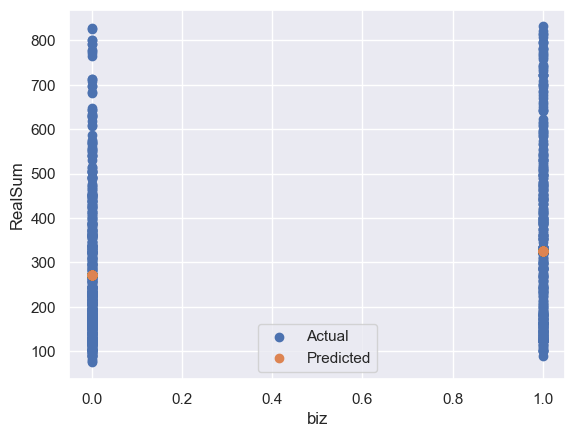

In [40]:
for biz in X2_test.columns:
    plt.scatter(X2_test[biz], y2_test, label="Actual")
    plt.scatter(X2_test[biz], y2_pred, label="Predicted")
    plt.xlabel("biz")
    plt.ylabel("RealSum")
    plt.legend()
    plt.show()


# PC

In [41]:
X3 = pc
y3 = rs.values.ravel()
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)
gb = HistGradientBoostingRegressor(learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X3_train, y3_train)
y3_pred = gb.predict(X3_test)
mse3 = mean_squared_error(y3_test, y3_pred)
print("Mean squared error: %.2f" % mse3)



Mean squared error: 19858.11


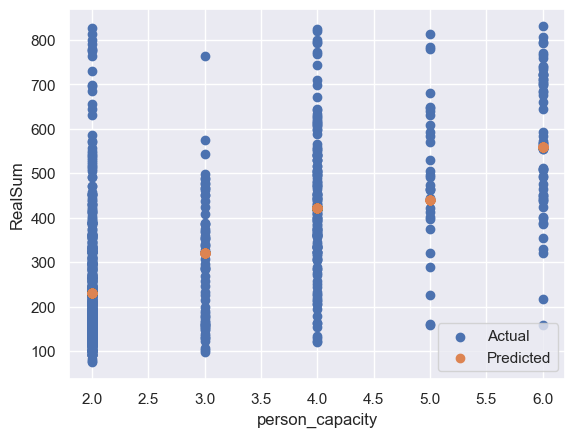

In [42]:
for person_capacity in X3_test.columns:
    plt.scatter(X3_test[person_capacity], y3_test, label="Actual")
    plt.scatter(X3_test[person_capacity], y3_pred, label="Predicted")
    plt.xlabel("person_capacity")
    plt.ylabel("RealSum")
    plt.legend()
    plt.show()


# Bedrooms

In [43]:
X4 = br
y4 = rs.values.ravel()
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42)
gb = HistGradientBoostingRegressor(learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X4_train, y4_train)
y4_pred = gb.predict(X4_test)
mse4 = mean_squared_error(y4_test, y4_pred)
print("Mean squared error: %.2f" % mse4)



Mean squared error: 23854.88


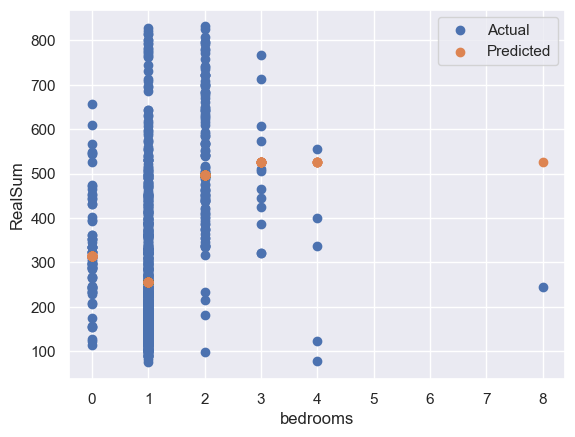

In [44]:
for bedrooms in X4_test.columns:
    plt.scatter(X4_test[bedrooms], y4_test, label="Actual")
    plt.scatter(X4_test[bedrooms], y4_pred, label="Predicted")
    plt.xlabel("bedrooms")
    plt.ylabel("RealSum")
    plt.legend()
    plt.show()


# DIST

In [45]:
X5 = dt
y5 = rs.values.ravel()
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.2, random_state=42)
gb = HistGradientBoostingRegressor(learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X5_train, y5_train)
y5_pred = gb.predict(X5_test)
mse5 = mean_squared_error(y5_test, y5_pred)
print("Mean squared error: %.2f" % mse5)



Mean squared error: 27501.14


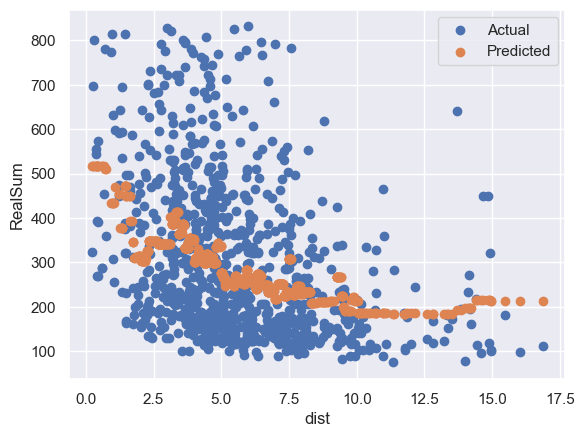

In [46]:
for dist in X5_test.columns:
    plt.scatter(X5_test[dist], y5_test, label="Actual")
    plt.scatter(X5_test[dist], y5_pred, label="Predicted")
    plt.xlabel("dist")
    plt.ylabel("RealSum")
    plt.legend()
    plt.show()


# AIN

In [47]:
X6 = ain
y6 = rs.values.ravel()
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.2, random_state=42)
gb = HistGradientBoostingRegressor(learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X6_train, y6_train)
y6_pred = gb.predict(X6_test)
mse6 = mean_squared_error(y6_test, y6_pred)
print("Mean squared error: %.2f" % mse6)



Mean squared error: 26941.99


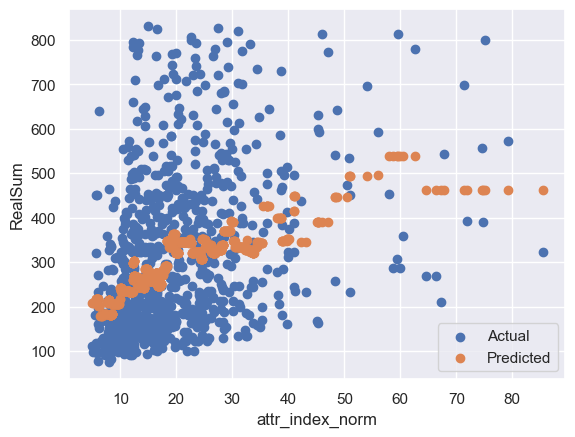

In [48]:
for attr_index_norm in X6_test.columns:
    plt.scatter(X6_test[attr_index_norm], y6_test, label="Actual")
    plt.scatter(X6_test[attr_index_norm], y6_pred, label="Predicted")
    plt.xlabel("attr_index_norm")
    plt.ylabel("RealSum")
    plt.legend()
    plt.show()


# RIN

In [49]:
X7 = rin
y7 = rs.values.ravel()
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, test_size=0.2, random_state=42)
gb = HistGradientBoostingRegressor(learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X7_train, y7_train)
y7_pred = gb.predict(X7_test)
mse7 = mean_squared_error(y7_test, y7_pred)
print("Mean squared error: %.2f" % mse7)



Mean squared error: 27134.59


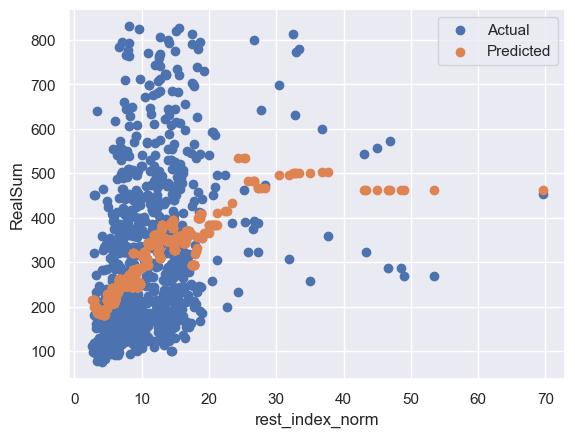

In [50]:
for rest_index_norm in X7_test.columns:
    plt.scatter(X7_test[rest_index_norm], y7_test, label="Actual")
    plt.scatter(X7_test[rest_index_norm], y7_pred, label="Predicted")
    plt.xlabel("rest_index_norm")
    plt.ylabel("RealSum")
    plt.legend()
    plt.show()
